In [ ]:
pip uninstall tf-nightly

In [ ]:
!pip install tensorflow

In [ ]:
import os
import tensorflow as tf
import IPython
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
# Deep learning libraries
#import keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Setting seeds for reproducibility
seed = 69
np.random.seed(seed)
tf.random.set_seed(seed)


In [ ]:
input_path = '/content/drive/My Drive/xncvfin'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for st in ['train', 'test']:
    n_0 = len(os.listdir(input_path + '/' + st + '/0'))
    n_1 = len(os.listdir(input_path + '/' + st + '/1'))
    n_2 = len(os.listdir(input_path + '/' + st + '/2'))
    n_3 = len(os.listdir(input_path + '/' + st + '/3'))
    n_4 = len(os.listdir(input_path + '/' + st + '/4'))
    n_5 = len(os.listdir(input_path + '/' + st + '/5'))
    n_6 = len(os.listdir(input_path + '/' + st + '/6'))
    n_7 = len(os.listdir(input_path + '/' + st + '/7'))
    n_8 = len(os.listdir(input_path + '/' + st + '/8'))
    n_9 = len(os.listdir(input_path + '/' + st + '/9'))
    n_10 = len(os.listdir(input_path + '/' + st + '/10'))
    n_11 = len(os.listdir(input_path + '/' + st + '/11'))
    n_12 = len(os.listdir(input_path + '/' + st + '/12'))
    n_13 = len(os.listdir(input_path + '/' + st + '/13'))
    n_14 = len(os.listdir(input_path + '/' + st + '/14'))
    n_15 = len(os.listdir(input_path + '/' + st + '/15'))
    n_16 = len(os.listdir(input_path + '/' + st + '/16'))
    n_17 = len(os.listdir(input_path + '/' + st + '/17'))
    n_18 = len(os.listdir(input_path + '/' + st + '/18'))
    print(st, n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8, n_9, n_10, n_11, n_12, n_13, n_14, n_15, n_16, n_17, n_18)

train 41 130 238 198 211 222 293 278 310 282 313 284 254 209 187 132 92 48 18
test 10 33 59 48 51 55 74 69 77 69 78 70 62 52 46 32 23 12 5


In [ ]:
!git clone https://github.com/WittmannF/LRFinder.git
from LRFinder.keras_callback import LRFinder

Cloning into 'LRFinder'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.


In [ ]:
lr_finder = LRFinder(min_lr=1e-5, max_lr=1)

In [ ]:
def preprocess(image):
  image = tf.image.adjust_contrast(image, contrast_factor = 0.3)
  image = tf.keras.applications.inception_resnet_v2.preprocess_input(image)
  return image

In [ ]:
def process_data(img_dims, batch_size):
    train_datagen = ImageDataGenerator(rotation_range=20, 
                                       rescale=1./255.0, 
                                       zoom_range=0.1, 
                                       vertical_flip=True, 
                                       width_shift_range=0.1,
                                       height_shift_range=0.1,
                                       shear_range=0.1)
                                       #preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
                                       #preprocessing_function=tf.keras.applications.densenet.preprocess_input)
    
    #test_val_datagen = ImageDataGenerator(rescale=1./255)
                                          #preprocessing_function=change_contrast)
    
    train_gen = train_datagen.flow_from_directory(directory=input_path+ '/' + 'train', 
                                                  target_size=(img_dims, img_dims), 
                                                  batch_size=batch_size, 
                                                  class_mode='categorical', 
                                                  shuffle=True)

    #test_gen = test_val_datagen.flow_from_directory(directory=input_path+ '/' + 'val', 
     #                                               target_size=(img_dims, img_dims), 
      #                                              batch_size=batch_size, 
       #                                             class_mode='categorical', 
        #                                            shuffle=True)
    
    test_data = []
    test_labels = []

    for cond in ['/0/', '/1/', '/2/', '/3/', '/4/', '/5/', '/6/', '/7/', '/8/', '/9/', '/10/', '/11/', '/12/', '/13/', '/14/', '/15/', '/16/', '/17/', '/18/']:
        for img in (os.listdir(input_path + '/' + 'test' + cond)):
            img = cv2.imread(input_path+ '/' + 'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            #img = preprocess(img)
            #img = change_contrast(img)
            if cond=='/0/':
              label = 0
            elif cond=='/1/':
              label = 1
            elif cond=='/2/':
              label = 2
            elif cond=='/3/':
              label = 3
            elif cond=='/4/':
              label = 4
            elif cond=='/5/':
              label = 5
            elif cond=='/6/':
              label = 6
            elif cond=='/7/':
              label = 7
            elif cond=='/8/':
              label = 8
            elif cond=='/9/':
              label = 9
            elif cond=='/10/':
              label = 10
            elif cond=='/11/':
              label = 11
            elif cond=='/12/':
              label = 12
            elif cond=='/13/':
              label = 13
            elif cond=='/14/':
              label = 14
            elif cond=='/15/':
              label = 15
            elif cond=='/16/':
              label = 16
            elif cond=='/17/':
              label = 17
            elif cond=='/18/':
              label = 18
            test_data.append(img)
            test_labels.append(label)
    test_data = np.array(test_data)/255.0
    #test_data = tf.keras.applications.inception_resnet_v2.preprocess_input(test_data)
    #test_data = tf.keras.applications.densenet.preprocess_input(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_data, test_labels

In [ ]:
img_dims = 300
batch_size = 32
train_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 3740 images belonging to 19 classes.


In [ ]:
test_data.shape

In [ ]:
import tensorflow_hub as hub

In [ ]:
model_url = "https://tfhub.dev/google/bit/m-r152x4/imagenet21k_classification/1"
module = hub.KerasLayer(model_url)

In [ ]:
class MyBiTModel(tf.keras.Model):
  """BiT with a new head."""

  def __init__(self, num_classes, module):
    super().__init__()

    self.num_classes = num_classes
    self.head = tf.keras.layers.Dense(num_classes, kernel_initializer='zeros')
    self.bit_model = module
  
  def call(self, images):
    # No need to cut head off since we are using feature extractor model
    bit_embedding = self.bit_model(images)
    return self.head(bit_embedding)

model = MyBiTModel(num_classes=19, module=module)

In [ ]:
lr = 0.003 * batch_size / 512
SCHEDULE_LENGTH = 500 * 512 / batch_size
SCHEDULE_BOUNDARIES = [200, 300, 400]
STEPS_PER_EPOCH = 10
# Decay learning rate by a factor of 10 at SCHEDULE_BOUNDARIES.
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES, 
                                                                   values=[lr, lr*0.1, lr*0.001, lr*0.0001])
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=50)

In [ ]:
test_data.shape

(769, 300, 300, 3)

In [ ]:
test_data[0]

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(test_labels),
                                        y = test_labels                                                    
                                    )
class_weights = dict(zip(np.unique(test_labels), class_weights)),
class_weights

In [ ]:
pip install -U keras-efficientnet-v2

In [ ]:
pip install keras-efficientnet-v2

In [ ]:
import keras_efficientnet_v2
model = keras_efficientnet_v2.EfficientNetV2B3(pretrained="imagenet", num_classes=19, include_preprocessing=True)

In [ ]:
!pip install git+https://github.com/sebastian-sz/efficientnet-v2-keras@main

In [ ]:
from efficientnet_v2 import EfficientNetV2B3

In [ ]:
i = tf.keras.layers.Input([img_dims, img_dims, 3])
i = tf.keras.applications.densenet.preprocess_input(i)
base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, pooling=None)
base_model.trainable = True
head_model = base_model(i)
head_model = Flatten()(head_model)
head_model = Dense(1024, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = BatchNormalization()(head_model)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = BatchNormalization()(head_model)
predictions = Dense(19, activation='softmax')(head_model)
model = tf.keras.Model(inputs=i, outputs=predictions)

In [ ]:
input_shape = (img_dims, img_dims, 3)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape),
    #tf.keras.applications.densenet.preprocess_input,
    tf.keras.layers.RandomContrast(0.3, seed=69),
    tf.keras.applications.DenseNet201(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_dims, img_dims, 3)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(19, activation='softmax')
])

In [ ]:
inputs = tf.keras.layers.InputLayer(input_shape=input_shape)
x = tf.keras.applications.densenet.preprocess_input(inputs)
outputs = rest_of_the_model(x)
model = keras.Model(inputs, outputs)

In [ ]:
opt = Adam(learning_rate=1e-2)
#es = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.05, patience=6)
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.7, patience=5, mode='auto')
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.6, patience=5, mode='auto')

In [ ]:
history = model.fit(
            train_gen, steps_per_epoch=train_gen.samples // batch_size,
            epochs=80, callbacks=[lr_reduce])

In [ ]:
tf.keras.models.save_model(model, filepath = '/content/drive/My Drive/dpsg')

INFO:tensorflow:Assets written to: /content/drive/My Drive/dpsg/assets


In [ ]:
for layer in model.layers:
  layer.trainable = True

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

In [ ]:
history = model.fit(
            train_gen, steps_per_epoch=train_gen.samples // batch_size,
            epochs=80, callbacks=[lr_reduce])

In [ ]:
#tf.keras.models.save_model(model, filepath = '/content/drive/My Drive/dpdpdp')

INFO:tensorflow:Assets written to: /content/drive/My Drive/dpdpdp/assets


In [ ]:
opt = Adam(learning_rate=1.5e-4)
#es = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.05, patience=6)
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=6, mode='auto')
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/dpsg')

In [ ]:
history = model.fit(
            train_gen, steps_per_epoch=train_gen.samples // batch_size,
            epochs=20, callbacks=[lr_reduce])

Epoch 1/20
116/116 [==============================] - 417s 4s/step - loss: 0.5141 - accuracy: 0.8077 - lr: 1.8750e-05
Epoch 2/20
116/116 [==============================] - 418s 4s/step - loss: 0.5520 - accuracy: 0.7975 - lr: 1.8750e-05
Epoch 3/20
116/116 [==============================] - 417s 4s/step - loss: 0.4992 - accuracy: 0.8163 - lr: 1.8750e-05
Epoch 4/20
116/116 [==============================] - 414s 4s/step - loss: 0.5349 - accuracy: 0.8012 - lr: 1.8750e-05
Epoch 5/20
116/116 [==============================] - 415s 4s/step - loss: 0.5030 - accuracy: 0.8142 - lr: 1.8750e-05
Epoch 6/20
116/116 [==============================] - 415s 4s/step - loss: 0.4948 - accuracy: 0.8255 - lr: 1.8750e-05
Epoch 7/20
116/116 [==============================] - 415s 4s/step - loss: 0.5066 - accuracy: 0.8193 - lr: 1.8750e-05
Epoch 8/20
116/116 [==============================] - 415s 4s/step - loss: 0.5130 - accuracy: 0.8131 - lr: 1.8750e-05
Epoch 9/20
116/116 [==============================] - 41

In [ ]:
#tf.keras.models.save_model(model, filepath = '/content/drive/My Drive/dpdpdp')

INFO:tensorflow:Assets written to: /content/drive/My Drive/dpdpdp/assets


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/dpdpdp')

In [ ]:
model.summary()

In [ ]:
predIdxs = model.predict(test_data)
predIdxs = np.argmax(predIdxs,axis=1)

NameError: ignored

In [ ]:
cm=confusion_matrix(test_labels, predIdxs, labels =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
print(cm.shape)
print(cm)

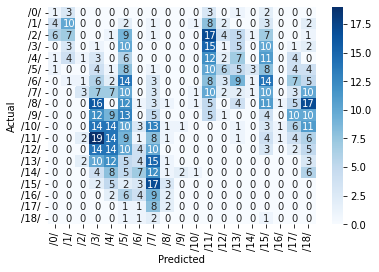

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['/0/', '/1/', '/2/', '/3/', '/4/', '/5/', '/6/', '/7/', '/8/', '/9/', '/10/', '/11/', '/12/', '/13/', '/14/', '/15/', '/16/', '/17/', '/18/'], yticklabels=['/0/', '/1/', '/2/', '/3/', '/4/', '/5/', '/6/', '/7/', '/8/', '/9/', '/10/', '/11/', '/12/', '/13/', '/14/', '/15/', '/16/', '/17/', '/18/'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

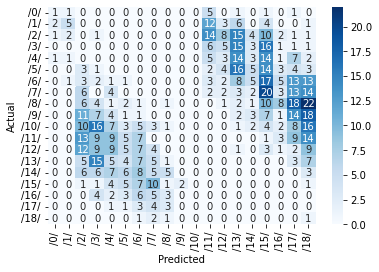

In [ ]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=['/0/', '/1/', '/2/', '/3/', '/4/', '/5/', '/6/', '/7/', '/8/', '/9/', '/10/', '/11/', '/12/', '/13/', '/14/', '/15/', '/16/', '/17/', '/18/'], yticklabels=['/0/', '/1/', '/2/', '/3/', '/4/', '/5/', '/6/', '/7/', '/8/', '/9/', '/10/', '/11/', '/12/', '/13/', '/14/', '/15/', '/16/', '/17/', '/18/'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

In [ ]:
import os
import cv2
for cond in ['/0/']:
        for img in (os.listdir(input_path + '/' + 'test' + cond)):
            print(img)
            img = cv2.imread(input_path+ '/' + 'test'+cond+img, 0)
            img = np.expand_dims(img, axis=-1)
            #img = cv2.resize(img, (img_dims, img_dims))
            print(img.shape)

In [ ]:
img = cv2.imread(input_path+ '/' + 'test'+'/0/'+'12506197572541509887.jpg')
print(img.shape)

(2350, 2866, 3)
